# Temporal Difference Learning methods for Control

> This is the summary of lecture "Sample-based Learning Methods" from Coursera.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Coursera, Reinforcement_Learning]
- image: 

## SARSA - GPI with TD

### Generalized Policy Iteration

![gpi](image/gpi.png)

### SARSA

The acronym describes the data used in the updates.

$$ S_t, A_t, R_{t+1}, S_{t+1}, A_{t+1} $$

$$ Q(S_t, A_t) \leftarrow Q(S_t, A_t) + \alpha \big(R_{t+1} + \gamma Q(S_{t+1}, A_{t+1}) - Q(S_t, A_t)\big) $$

Recall the TD update,

$$ V((S_t) \leftarrow V(S_t) + \alpha \big( R_{t+1} + \gamma (V(S_{t+1}) - V(S_t)\big) $$

As a result, **SARSA** is the GPI algorithm that uses TD for policy evaluation.

## What is Q-learning?

### Q-learning (off-policy TD Control) for estimating $\pi \approx \pi_{*}$

$\begin{aligned}
&\text{Algorithm parameters: step size } \alpha \in (0, 1], \text{ small } \epsilon > 0 \\
&\text{Initialize } Q(s, a), \text{ for all } s \in \mathcal{S}^{+}, a \in \mathcal{A}(s), \text{ arbitrarily except that } Q(terminal, \cdot) = 0 \\
\newline
&\text{Loop for each episode: } \\
&\quad \text{Initialize } S\\
&\quad \text{Loop for each step of episode:} \\
&\qquad \text{Choose } A \text{ from } S \text{ using policy derived from } Q \text{ (e.g., } \epsilon-\text{greedy)} \\
&\qquad \text{Take action } A, \text{ observe } R, S' \\
&\qquad Q(S, A) \leftarrow Q(S, A) + \alpha [R + \gamma \max_{a} Q(S', a) - Q(S, A)] \\
&\qquad S \leftarrow S' \\
&\quad \text{until } S \text{ is terminal} \\
\end{aligned}$

### Revisiting Bellman equations

- SARSA: SARSA is sample-based version of policy iteration, and it uses standard bellman equation for action value.

$q_{\pi}(s, a) = \sum_{s', r} p(s', r \vert s, a) \big(r + \gamma \sum_{a'}\pi(a' \vert s') q_{\pi}(s', a')\big) \\
Q(S_t, A_t) \leftarrow Q(S_t, A_t) + \alpha \big(R_{t+1} + \gamma Q(S_{t+1}, A_{t+1}) - Q(S_t, A_t)\big) $

- Q-learning: Q-learning is sample-based version of value iteration, and it uses bellman optimality equation.

$q_{*}(s, a) = \sum_{s', r} p(s', r \vert s, a) \big(r + \gamma \max_{a'} q_{*}(s', a') \big) \\
Q(S_t, A_t) \leftarrow Q(S_t, A_t) + \alpha \big( R_{t+1} + \gamma \max_{a'} Q(S_{t+1}, a') - Q(S_t, A_t)\big) $

## How is Q-learning off-policy?

SARSA selects its action from current policy ($\pi$). In this case, the target policy and the behavior policy is the same.(**on-policy**) But in Q-learning, action is selected from optimal policy($\pi_{*}$), that is, the target policy is not the same as the behavior policy. This is called **off-policy**. But when taking the expection of state-action value in Q-learning, it is same as current policy, so it doesn't require any importance sampling techniques.

## Expected SARSA

### The expected SARSA algorithm

- SARSA: $Q(S_t, A_t) \leftarrow Q(S_t, A_t) + \alpha ( R_{t+1} + \gamma Q(S_{t+1}, A_{t+1}) - Q(S_t, A_t))$
- Expected SARSA: $Q(S_t, A_t) \leftarrow Q(S_t, A_t) + \alpha (R_{t+1} + \gamma \sum_{a'}\pi(a' \vert S_{t+1}) Q(S_{t+1}, a') - Q(S_t, A_t))$
: its value can be updated with stable.

## TD Control and bellman equation

![td](image/td_control_and_be.png)

## Assignment - Q-Learning and Expected Sarsa

In this section, you will:

1. Implement Q-Learning with $\epsilon$-greedy action selection
2. Implement Expected Sarsa with $\epsilon$-greedy action selection
3. Investigate how these two algorithms behave on Cliff World (described on page 132 of the textbook)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy.stats import sem
from rl_glue import RLGlue
from Agent import BaseAgent
import cliffworld_env

plt.rcParams.update({'font.size': 15})
plt.rcParams.update({'figure.figsize': [16, 10]})

### Q-Learning

In this section you will implement and test a Q-Learning agent with $\epsilon$-greedy action selection (Section 6.5 in the textbook). 

In [3]:
class QLearningAgent(BaseAgent):
    def agent_init(self, agent_init_info):
        """Setup for the agent called when the experiment first starts.
        
        Args:
        agent_init_info (dict), the parameters used to initialize the agent. The dictionary contains:
        {
            num_states (int): The number of states,
            num_actions (int): The number of actions,
            epsilon (float): The epsilon parameter for exploration,
            step_size (float): The step-size,
            discount (float): The discount factor,
        }
        
        """
        # Store the parameters provided in agent_init_info.
        self.num_actions = agent_init_info["num_actions"]
        self.num_states = agent_init_info["num_states"]
        self.epsilon = agent_init_info["epsilon"]
        self.step_size = agent_init_info["step_size"]
        self.discount = agent_init_info["discount"]
        self.rand_generator = np.random.RandomState(agent_info["seed"])
        
        # Create an array for action-value estimates and initialize it to zero.
        self.q = np.zeros((self.num_states, self.num_actions)) # The array of action-value estimates.

        
    def agent_start(self, observation):
        """The first method called when the episode starts, called after
        the environment starts.
        Args:
            observation (int): the state observation from the
                environment's evn_start function.
        Returns:
            action (int): the first action the agent takes.
        """
        
        # Choose action using epsilon greedy.
        state = observation
        current_q = self.q[state,:]
        if self.rand_generator.rand() < self.epsilon:
            action = self.rand_generator.randint(self.num_actions)
        else:
            action = self.argmax(current_q)
        self.prev_state = state
        self.prev_action = action
        return action
    
    def agent_step(self, reward, observation):
        """A step taken by the agent.
        Args:
            reward (float): the reward received for taking the last action taken
            observation (int): the state observation from the
                environment's step based on where the agent ended up after the
                last step.
        Returns:
            action (int): the action the agent is taking.
        """
        
        # Choose action using epsilon greedy.
        state = observation
        current_q = self.q[state, :]
        if self.rand_generator.rand() < self.epsilon:
            action = self.rand_generator.randint(self.num_actions)
        else:
            action = self.argmax(current_q)
        
        # Perform an update
        # --------------------------
        self.q[self.prev_state, self.prev_action] = self.q[self.prev_state, self.prev_action] + \
                                                    self.step_size * \
                                                    (reward + self.discount * np.max(current_q) - self.q[self.prev_state, self.prev_action])
        
        # --------------------------
        
        self.prev_state = state
        self.prev_action = action
        return action
    
    def agent_end(self, reward):
        """Run when the agent terminates.
        Args:
            reward (float): the reward the agent received for entering the
                terminal state.
        """
        # Perform the last update in the episode
        # --------------------------
        self.q[self.prev_state, self.prev_action] = self.q[self.prev_state, self.prev_action] + \
                                                    self.step_size * \
                                                    (reward - self.q[self.prev_state, self.prev_action])
        
        # --------------------------
        
    def argmax(self, q_values):
        """argmax with random tie-breaking
        Args:
            q_values (Numpy array): the array of action-values
        Returns:
            action (int): an action with the highest value
        """
        top = float("-inf")
        ties = []

        for i in range(len(q_values)):
            if q_values[i] > top:
                top = q_values[i]
                ties = []

            if q_values[i] == top:
                ties.append(i)

        return self.rand_generator.choice(ties)

### Expected Sarsa

In this section you will implement an Expected Sarsa agent with $\epsilon$-greedy action selection (Section 6.6 in the textbook). 

In [4]:
class ExpectedSarsaAgent(BaseAgent):
    def agent_init(self, agent_init_info):
        """Setup for the agent called when the experiment first starts.
        
        Args:
        agent_init_info (dict), the parameters used to initialize the agent. The dictionary contains:
        {
            num_states (int): The number of states,
            num_actions (int): The number of actions,
            epsilon (float): The epsilon parameter for exploration,
            step_size (float): The step-size,
            discount (float): The discount factor,
        }
        
        """
        # Store the parameters provided in agent_init_info.
        self.num_actions = agent_init_info["num_actions"]
        self.num_states = agent_init_info["num_states"]
        self.epsilon = agent_init_info["epsilon"]
        self.step_size = agent_init_info["step_size"]
        self.discount = agent_init_info["discount"]
        self.rand_generator = np.random.RandomState(agent_info["seed"])
        
        # Create an array for action-value estimates and initialize it to zero.
        self.q = np.zeros((self.num_states, self.num_actions)) # The array of action-value estimates.

        
    def agent_start(self, observation):
        """The first method called when the episode starts, called after
        the environment starts.
        Args:
            observation (int): the state observation from the
                environment's evn_start function.
        Returns:
            action (int): the first action the agent takes.
        """
        
        # Choose action using epsilon greedy.
        state = observation
        current_q = self.q[state, :]
        if self.rand_generator.rand() < self.epsilon:
            action = self.rand_generator.randint(self.num_actions)
        else:
            action = self.argmax(current_q)
        self.prev_state = state
        self.prev_action = action
        return action
    
    def agent_step(self, reward, observation):
        """A step taken by the agent.
        Args:
            reward (float): the reward received for taking the last action taken
            observation (int): the state observation from the
                environment's step based on where the agent ended up after the
                last step.
        Returns:
            action (int): the action the agent is taking.
        """
        
        # Choose action using epsilon greedy.
        state = observation
        current_q = self.q[state,:]
        if self.rand_generator.rand() < self.epsilon:
            action = self.rand_generator.randint(self.num_actions)
        else:
            action = self.argmax(current_q)
        
        # Perform an update
        # --------------------------
        non_greedy_prob = self.epsilon / self.num_actions
        greedy_prob = (1 - self.epsilon) + non_greedy_prob
        
        pi_list = np.ones(shape=(self.num_actions, )) * non_greedy_prob
        if action == self.argmax(current_q):
            pi_list[action] = greedy_prob
            
        expected_q = 0
        for i in range(self.num_actions):
            expected_q += pi_list[i] * current_q[i]

        self.q[self.prev_state, self.prev_action] = self.q[self.prev_state, self.prev_action] + \
                                                    self.step_size * \
                                                    (reward + self.discount * expected_q - self.q[self.prev_state, self.prev_action]) 
        # --------------------------
        
        self.prev_state = state
        self.prev_action = action
        return action
    
    def agent_end(self, reward):
        """Run when the agent terminates.
        Args:
            reward (float): the reward the agent received for entering the
                terminal state.
        """
        # Perform the last update in the episode
        # --------------------------
        self.q[self.prev_state, self.prev_action] = self.q[self.prev_state, self.prev_action] + \
                                                    self.step_size * \
                                                    (reward - self.q[self.prev_state, self.prev_action]) 
        # --------------------------
        
    def argmax(self, q_values):
        """argmax with random tie-breaking
        Args:
            q_values (Numpy array): the array of action-values
        Returns:
            action (int): an action with the highest value
        """
        top = float("-inf")
        ties = []

        for i in range(len(q_values)):
            if q_values[i] > top:
                top = q_values[i]
                ties = []

            if q_values[i] == top:
                ties.append(i)

        return self.rand_generator.choice(ties)

### Solving the Cliff World

We described the Cliff World environment in the video "Expected Sarsa in the Cliff World" in Lesson 3. This is an undiscounted episodic task and thus we set $\gamma$=1. The agent starts in the bottom left corner of the gridworld below and takes actions that move it in the four directions. Actions that would move the agent off of the cliff incur a reward of -100 and send the agent back to the start state. The reward for all other transitions is -1. An episode terminates when the agent reaches the bottom right corner. 

![cliff](image/cliffworld.png)

Using the experiment program in the cell below we now compare the agents on the Cliff World environment and plot the sum of rewards during each episode for the two agents.

The result of this cell will be graded. If you make any changes to your algorithms, you have to run this cell again before submitting the assignment.

100%|██████████| 100/100 [00:18<00:00,  5.38it/s]


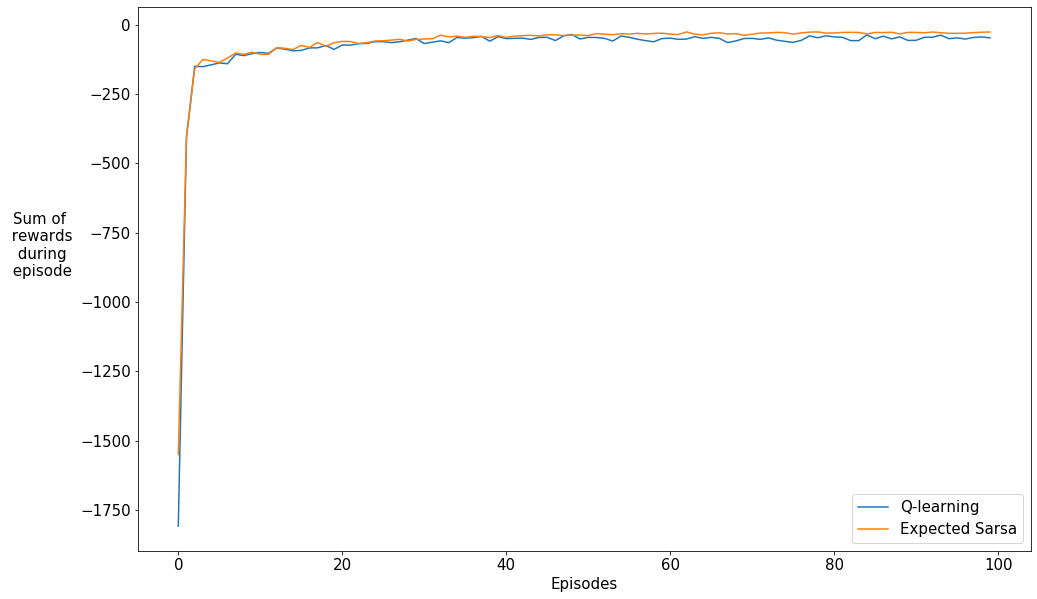

In [7]:
np.random.seed(0)

agents = {
    "Q-learning": QLearningAgent,
    "Expected Sarsa": ExpectedSarsaAgent
}
env = cliffworld_env.Environment
all_reward_sums = {} # Contains sum of rewards during episode
all_state_visits = {} # Contains state visit counts during the last 10 episodes
agent_info = {"num_actions": 4, "num_states": 48, "epsilon": 0.1, "step_size": 0.5, "discount": 1.0}
env_info = {}
num_runs = 100 # The number of runs
num_episodes = 100 # The number of episodes in each run

for algorithm in ["Q-learning", "Expected Sarsa"]:
    all_reward_sums[algorithm] = []
    all_state_visits[algorithm] = []
    for run in tqdm(range(num_runs)):
        agent_info["seed"] = run
        rl_glue = RLGlue(env, agents[algorithm])
        rl_glue.rl_init(agent_info, env_info)

        reward_sums = []
        state_visits = np.zeros(48)
        last_episode_total_reward = 0
        for episode in range(num_episodes):
            if episode < num_episodes - 10:
                # Runs an episode
                rl_glue.rl_episode(10000) 
            else: 
                # Runs an episode while keeping track of visited states
                state, action = rl_glue.rl_start()
                state_visits[state] += 1
                is_terminal = False
                while not is_terminal:
                    reward, state, action, is_terminal = rl_glue.rl_step()
                    state_visits[state] += 1
                
            reward_sums.append(rl_glue.rl_return() - last_episode_total_reward)
            last_episode_total_reward = rl_glue.rl_return()
            
        all_reward_sums[algorithm].append(reward_sums)
        all_state_visits[algorithm].append(state_visits)

# plot results
for algorithm in ["Q-learning", "Expected Sarsa"]:
    plt.plot(np.mean(all_reward_sums[algorithm], axis=0), label=algorithm)
plt.xlabel("Episodes")
plt.ylabel("Sum of\n rewards\n during\n episode",rotation=0, labelpad=40)
# plt.xlim(0,100)
# plt.ylim(-30,0)
plt.legend()
plt.show()

To see why these two agents behave differently, let's inspect the states they visit most. Run the cell below to generate plots showing the number of timesteps that the agents spent in each state over the last 10 episodes.

/home/chanseok/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


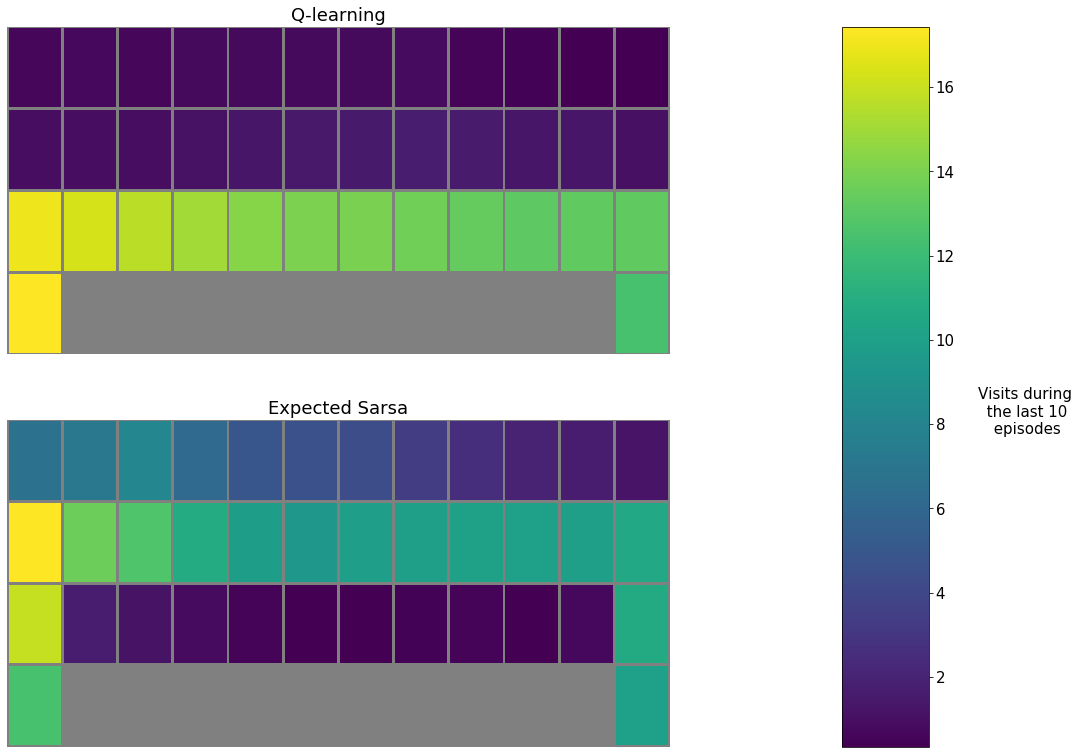

In [6]:
for algorithm, position in [("Q-learning", 211), ("Expected Sarsa", 212)]:
    plt.subplot(position)
    average_state_visits = np.array(all_state_visits[algorithm]).mean(axis=0)
    grid_state_visits = average_state_visits.reshape((4,12))
    grid_state_visits[0,1:-1] = np.nan
    plt.pcolormesh(grid_state_visits, edgecolors='gray', linewidth=2)
    plt.title(algorithm)
    plt.axis('off')
    cm = plt.get_cmap()
    cm.set_bad('gray')

    plt.subplots_adjust(bottom=0.0, right=0.7, top=1.0)
    cax = plt.axes([0.85, 0.0, 0.075, 1.])
    
cbar = plt.colorbar(cax=cax)
cbar.ax.set_ylabel("Visits during\n the last 10\n episodes", rotation=0, labelpad=70)
plt.show()

The Q-learning agent learns the optimal policy, one that moves along the cliff and reaches the goal in as few steps as possible. However, since the agent does not follow the optimal policy and uses $\epsilon$-greedy exploration, it occasionally falls off the cliff. The Expected Sarsa agent takes exploration into account and follows a safer path.


Previously we used a fixed step-size of 0.5 for the agents. What happens with other step-sizes? Does this difference in performance persist?

In the next experiment we will try 10 different step-sizes from 0.1 to 1.0 and compare the sum of rewards per episode averaged over the first 100 episodes (similar to the interim performance curves in Figure 6.3 of the textbook). Shaded regions show standard errors.

This cell takes around 10 minutes to run. The result of this cell will be graded. If you make any changes to your algorithms, you have to run this cell again before submitting the assignment.

100%|██████████| 600/600 [01:40<00:00,  5.98it/s]


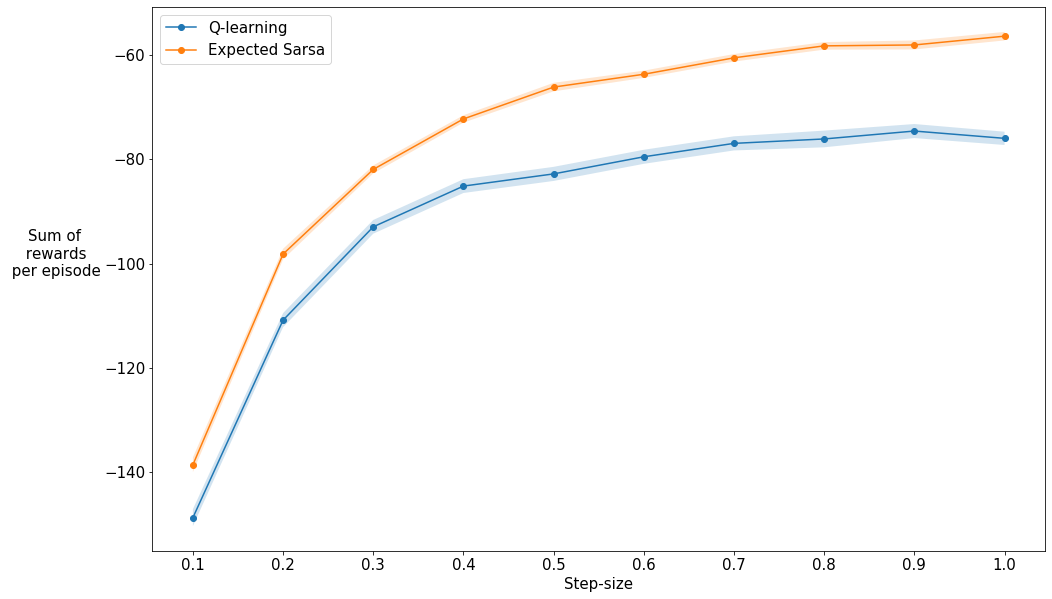

In [8]:
from itertools import product

agents = {
    "Q-learning": QLearningAgent,
    "Expected Sarsa": ExpectedSarsaAgent
}
env = cliffworld_env.Environment
all_reward_sums = {}
step_sizes = np.linspace(0.1,1.0,10)
agent_info = {"num_actions": 4, "num_states": 48, "epsilon": 0.1, "discount": 1.0}
env_info = {}
num_runs = 30
num_episodes = 100
all_reward_sums = {}

algorithms = ["Q-learning", "Expected Sarsa"]
cross_product = list(product(algorithms, step_sizes, range(num_runs)))
for algorithm, step_size, run in tqdm(cross_product):
    if (algorithm, step_size) not in all_reward_sums:
        all_reward_sums[(algorithm, step_size)] = []

    agent_info["step_size"] = step_size
    agent_info["seed"] = run
    rl_glue = RLGlue(env, agents[algorithm])
    rl_glue.rl_init(agent_info, env_info)

    last_episode_total_reward = 0
    for episode in range(num_episodes):
        rl_glue.rl_episode(0)
    all_reward_sums[(algorithm, step_size)].append(rl_glue.rl_return()/num_episodes)
        

for algorithm in ["Q-learning", "Expected Sarsa"]:
    algorithm_means = np.array([np.mean(all_reward_sums[(algorithm, step_size)]) for step_size in step_sizes])
    algorithm_stds = np.array([sem(all_reward_sums[(algorithm, step_size)]) for step_size in step_sizes])
    plt.plot(step_sizes, algorithm_means, marker='o', linestyle='solid', label=algorithm)
    plt.fill_between(step_sizes, algorithm_means + algorithm_stds, algorithm_means - algorithm_stds, alpha=0.2)

plt.legend()
plt.xlabel("Step-size")
plt.ylabel("Sum of\n rewards\n per episode",rotation=0, labelpad=50)
plt.xticks(step_sizes)
plt.show()

Expected Sarsa shows an advantage over Q-learning in this problem across a wide range of step-sizes.